In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('tl-data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39523 entries, 0 to 39522
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39523 non-null  object 
 1   username     39523 non-null  object 
 2   gamesplayed  39523 non-null  int64  
 3   gameswon     39523 non-null  int64  
 4   tr           39523 non-null  float64
 5   glicko       39523 non-null  float64
 6   rd           39523 non-null  float64
 7   rank         39523 non-null  object 
 8   apm          39523 non-null  float64
 9   pps          39523 non-null  float64
 10  vs           39523 non-null  float64
 11  verified     39523 non-null  bool   
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [47]:
df.head()

,id,username,gamesplayed,gameswon,tr,glicko,rd,rank,apm,pps,vs,verified
0,5e844b0868270e617d52c990,czsmall0402,391,366,24998.934924,4158.463319,89.843038,x,171.64,2.97,354.24,True
1,5e7cbb652932b46c9c671ce4,icly,817,743,24998.728379,4119.424681,96.151650,x,177.96,3.41,354.25,False
2,5f5dbcc4454e942b4fdfc5fa,vincehd,1015,694,24998.188569,4006.619874,75.503914,x,161.76,3.38,332.04,True
3,5eb11da1e47b643b5d12e5f1,kazu,1590,1221,24997.505531,3931.896690,86.448398,x,153.29,3.23,306.90,False
4,5e697bbf77aba60f95fb38da,firestorm,3037,2409,24997.002804,3871.926212,72.571946,x,163.03,3.13,331.62,True


<AxesSubplot:xlabel='rank', ylabel='count'>

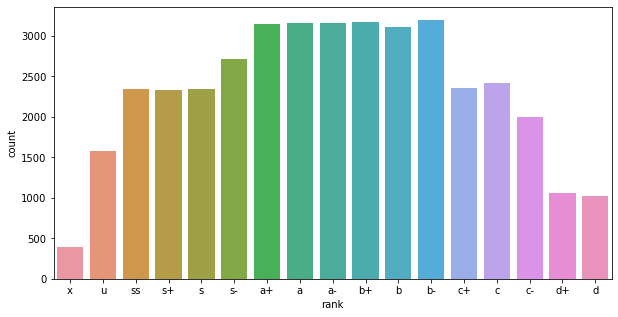

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='rank')

<div>
   <img src=https://tetris.wiki/images/thumb/4/47/Tetra_League_TR_and_Rank_Information_-_Tetrio.png/1200px-Tetra_League_TR_and_Rank_Information_-_Tetrio.png width="00">
</div>

Text(0.5, 1.0, 'Distribution of apm')

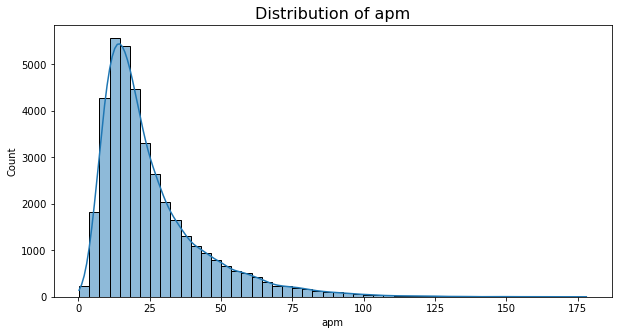

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(ax=ax, data=df, x='apm', kde=True, bins=50)
plt.title('Distribution of apm', fontsize=16)

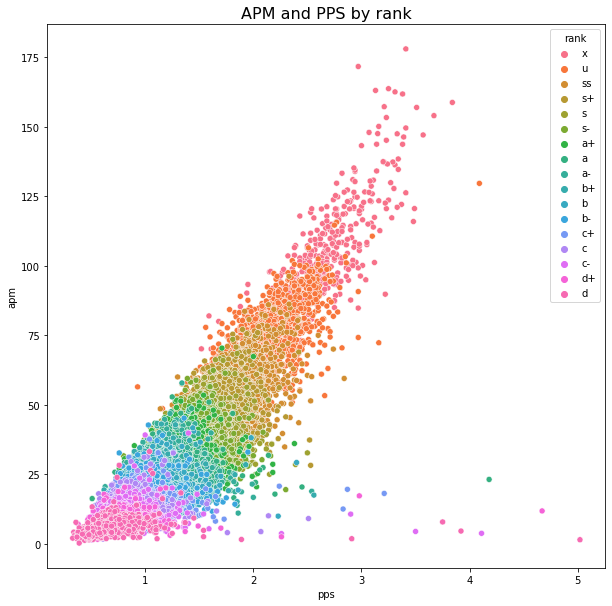

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=df['pps'], y=df['apm'], hue=df['rank'], ax=ax)
plt.title('APM and PPS by rank', fontsize=16);

In [51]:
idx = np.where(df['apm'] < (df['pps']-2)*(75))
df = df.drop(idx[0], axis=0)

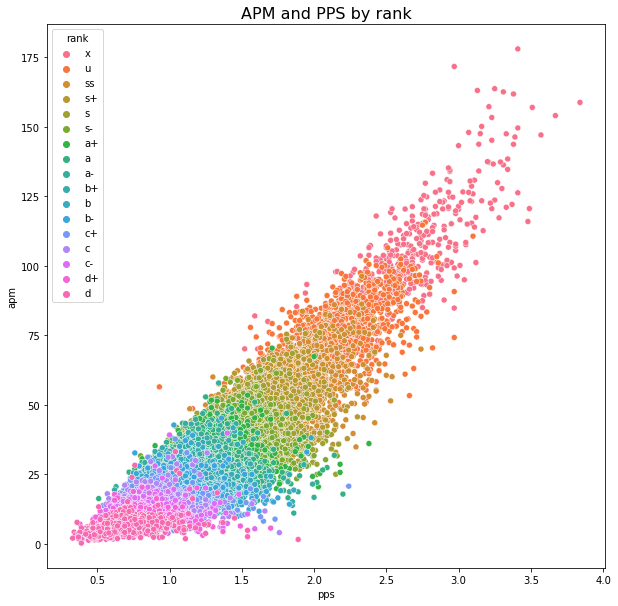

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=df['pps'], y=df['apm'], hue=df['rank'], ax=ax)
plt.title('APM and PPS by rank', fontsize=16);

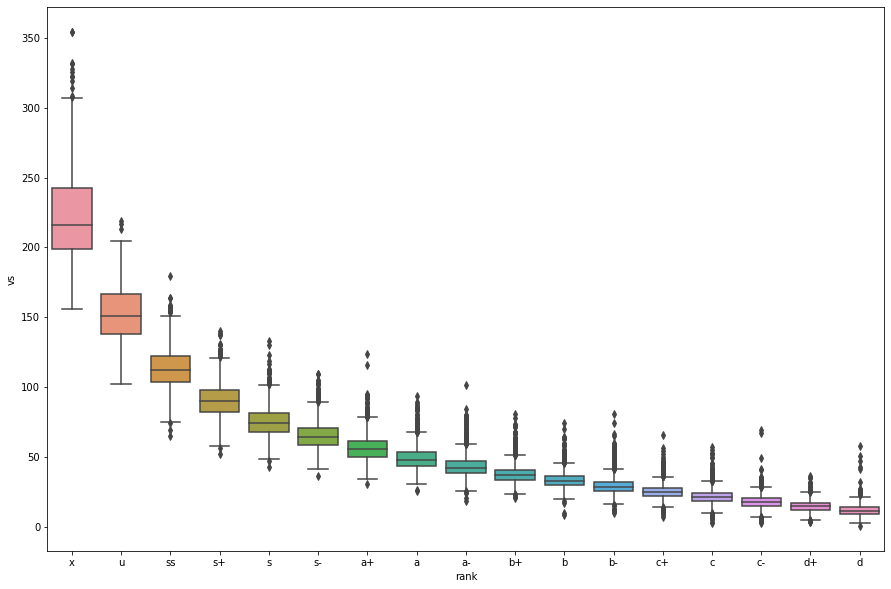

In [159]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="rank", y="vs", data=df)
plt.show()

# Ok no more plots

In [63]:
X = df[['gamesplayed', 'gameswon', 'apm', 'pps', 'app', 'vs']]
X['app'] = X['apm']/(60*X['pps'])

y = df['rank']

In [64]:
X.head()

,gamesplayed,gameswon,apm,pps,app,vs
0,391,366,171.64,2.97,0.963187,354.24
1,817,743,177.96,3.41,0.869795,354.25
2,1015,694,161.76,3.38,0.797633,332.04
3,1590,1221,153.29,3.23,0.790970,306.90
4,3037,2409,163.03,3.13,0.868104,331.62


In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [90]:
dt = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [7, 8, 9, 10, None]}

gs = GridSearchCV(dt, param_grid)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, None]})

In [97]:
dt_best = gs.best_estimator_.fit(X, y)

In [120]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dt_best, out_file=None, 
                                feature_names = X.columns, 
                                class_names = sorted(df['rank'].unique()),
                                filled=True)

# Predictions

In [166]:
gp, gw, apm, pps, vs = map(float, input('Enter: \n games played\n games won\n apm\n pps\n vs\nseparated by spaces: \n').split())
app = apm/(60*pps)

X = np.array([gp, gw, apm, pps, app, vs]).reshape(1, -1)

print(dt_best.predict(X)[0])

Enter: 
 games played
 games won
 apm
 pps
 vs
separated by spaces: 
315 179 38.67 1.35 77.06
s
